In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import random

2022-07-03 10:29:11.469165: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-03 10:29:11.469184: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
DIRECTORY = r"/home/user/ML/Deep Learning/CNN/Covid/train"

CATEGORIES = ["Covid","Normal","Viral Pneumonia"]

data = []
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY,category)
    label = CATEGORIES.index(category)
#     print(folder)
    for img in os.listdir(folder):
        img = os.path.join(folder,img)
        img_arr = cv2.imread(img)
        img_arr = cv2.resize(img_arr,(100,100))
#         plt.imshow(img_arr)
#         print(img_arr)
        data.append([img_arr,label])
        

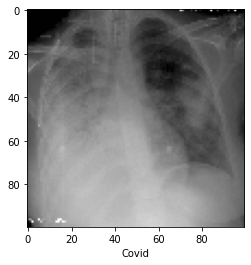

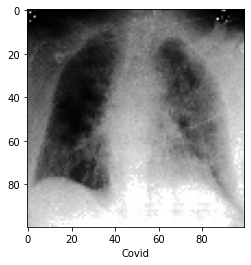

In [3]:
def get_label(index):
    if index == 0:
        return "Covid"
    if index == 1:
        return "Normal"
    if index == 2:
        return "Viral Pneumonia"
    
def show_pic(index): 
    plt.imshow(data[index][0])
    plt.xlabel(get_label(data[index][1]))
    plt.show()
    
show_pic(5)
show_pic(1)


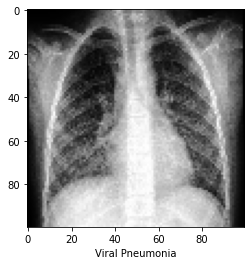

In [4]:
random.shuffle(data)
show_pic(2)

In [5]:
X = []
Y = []

for features, label in data:
    X.append(features)   
    Y.append(label)
    
    
X = np.asarray(X)
Y = np.asarray(Y)

X = X / 255
X.shape[1:]

(100, 100, 3)

In [6]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

#pre=processing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen = train_datagen.flow_from_directory(
    DIRECTORY,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset = 'training'
)

test_datagen = test_datagen.flow_from_directory(
    DIRECTORY,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset = 'validation'
)

Found 226 images belonging to 3 classes.
Found 25 images belonging to 3 classes.


In [7]:

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model = Sequential()
model.add(Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2,strides=2))

# cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(Flatten())
model.add(Dense(3,activation='softmax'))

2022-07-03 10:29:20.996812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-03 10:29:20.997124: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-07-03 10:29:20.997184: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-07-03 10:29:20.997236: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: lib

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagen,epochs=20,validation_data=test_datagen)

Epoch 1/20
4/4 [==============================] - 13s 4s/step - loss: 5.5388 - accuracy: 0.3938 - val_loss: 7.3193 - val_accuracy: 0.2800
Epoch 2/20
4/4 [==============================] - 11s 3s/step - loss: 3.4891 - accuracy: 0.4513 - val_loss: 1.8791 - val_accuracy: 0.5600
Epoch 3/20
4/4 [==============================] - 11s 3s/step - loss: 2.0954 - accuracy: 0.6283 - val_loss: 2.2841 - val_accuracy: 0.4400
Epoch 4/20
4/4 [==============================] - 11s 3s/step - loss: 1.0883 - accuracy: 0.6947 - val_loss: 1.3514 - val_accuracy: 0.3600
Epoch 5/20
4/4 [==============================] - 11s 3s/step - loss: 0.7930 - accuracy: 0.5664 - val_loss: 0.8359 - val_accuracy: 0.5600
Epoch 6/20
4/4 [==============================] - 11s 3s/step - loss: 0.5810 - accuracy: 0.7965 - val_loss: 0.5958 - val_accuracy: 0.7600
Epoch 7/20
4/4 [==============================] - 11s 3s/step - loss: 0.5460 - accuracy: 0.8097 - val_loss: 0.5594 - val_accuracy: 0.7600
Epoch 8/20
4/4 [==================

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 3)                 602115    
                                                                 
Total params: 603,907
Trainable params: 603,907
Non-trainable params: 0
_________________________________________________________________


In [106]:
from keras.preprocessing import image
path = "/home/user/ML/Deep Learning/CNN/Covid/test/net"
# path = "/home/user/ML/Deep Learning/CNN/Covid/test/Normal"
img = path + "/PN.jpeg"
try:
    
    img_pred = tf.keras.utils.load_img(img,target_size=(IMAGE_SIZE,IMAGE_SIZE))
    img_pred = tf.keras.utils.img_to_array(img_pred)
    img_pred = img_pred / 255
    img_pred = np.expand_dims(img_pred, axis=0)
except:
    print("file not found!")

result = model.predict(img_pred)
# plt.imshow(img_pred)
print(result)
def get_reuslt(res):
    max_val = np.amax(res)
  
    list = res.tolist()
    max_val = max_val.tolist()
    max_index = list[0].index(max_val)
    return get_label(max_index)

   
    
print(get_reuslt(result))
    

1/1 [==============================] - 0s 15ms/step
[[0.00310474 0.1439602  0.8529351 ]]
Viral Pneumonia


In [98]:
# model.evaluate(X,Y)